In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./incident.csv")

In [3]:
df.head()

,assignment_group,short_description
0,AZTEC.GP04.HRIT.01,Super admin and RBP access for Rollout team | ...
1,AZTEC.GP04.HRIT.03,LMS Legacy reports Error | AZ Egypt | Live | <...
2,AZTEC.GP04.HRIT.01,AZ France employees can't connect to SF | AZ F...
3,AZTEC.GP04.HRIT.01,Personalwelt (SAP. IND. Success-Factors) - Kei...
4,AZTEC.GP04.HRIT.05,Which eRecruiting user is correct manager?


In [4]:
print(df.shape)

(5146, 2)


In [5]:
col = ['assignment_group', 'short_description']
df= df[col]
df= df[pd.notnull(df['short_description'])]

In [6]:
df.columns=['assignment_group', 'short_description']

In [7]:
df['category_id'] = df['assignment_group'].factorize()[0]

In [8]:
cat_id_df = df[["assignment_group", "category_id"]].drop_duplicates().sort_values('category_id')

In [9]:
cat_to_id = dict(cat_id_df.values)

In [10]:
id_to_cat = dict(cat_id_df[['category_id','assignment_group']].values)

In [11]:
df.head()

,assignment_group,short_description,category_id
0,AZTEC.GP04.HRIT.01,Super admin and RBP access for Rollout team | ...,0
1,AZTEC.GP04.HRIT.03,LMS Legacy reports Error | AZ Egypt | Live | <...,1
2,AZTEC.GP04.HRIT.01,AZ France employees can't connect to SF | AZ F...,0
3,AZTEC.GP04.HRIT.01,Personalwelt (SAP. IND. Success-Factors) - Kei...,0
4,AZTEC.GP04.HRIT.05,Which eRecruiting user is correct manager?,2


In [12]:
import matplotlib.pyplot as plt

In [13]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

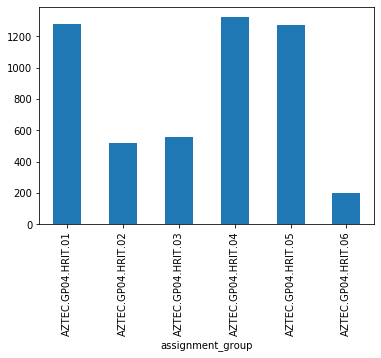

In [14]:
df.groupby('assignment_group').short_description.count().plot.bar(ylim=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [17]:
features = tfidf.fit_transform(df.short_description).toarray()

In [18]:
labels = df.category_id
features.shape

(5146, 1450)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['short_description'], df['assignment_group'], random_state= 0)

In [21]:
y_test.shape

(1287,)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
count_vect = CountVectorizer()

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [26]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [27]:
print(clf.predict(count_vect.transform(['Employee Tausib Sayyed: '])))

['AZTEC.GP04.HRIT.01']


In [28]:
y_pred = clf.predict(count_vect.transform(X_test))

In [29]:
from sklearn import metrics

In [30]:
print(metrics.classification_report(y_test,y_pred, labels= df.assignment_group, target_names=df['assignment_group'].unique()))

                    precision    recall  f1-score   support

AZTEC.GP04.HRIT.01       0.79      0.94      0.86       330
AZTEC.GP04.HRIT.03       0.86      0.69      0.77       140
AZTEC.GP04.HRIT.05       0.79      0.94      0.86       330
AZTEC.GP04.HRIT.04       0.79      0.94      0.86       330
AZTEC.GP04.HRIT.02       1.00      0.99      0.99       324
AZTEC.GP04.HRIT.06       0.79      0.94      0.86       330

          accuracy                           0.90   1394560
         macro avg       0.90      0.89      0.89   1394560
      weighted avg       0.90      0.92      0.90   1394560



C:\Users\faiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1989: UserWarning: labels size, 5146, does not match size of target_names, 6
  .format(len(labels), len(target_names))


In [31]:
#import pickle
#print(clf.predict(count_vect.transform(['Employee Tausib Sayyed: '])))

In [32]:
#with open('model_pickle','wb') as f:
#          pickle.dump(clf,f)

In [33]:
#with open('model_pickle','rb') as f:
#    mp=pickle.load(f)

In [34]:
#print(mp.predict(count_vect.transform(['RBP  compensation '])))

In [35]:
#with open('vectorizer.pk', 'wb') as fin:
#    pickle.dump(tfidf, fin)

In [36]:
import joblib

In [37]:
joblib.dump(clf, "model.sav")
joblib.dump(count_vect, "vectorizer.sav")

['vectorizer.sav']

In [38]:
text = "tv future in the hands of viewers with home"
 

In [39]:
vectorizer1 = joblib.load("vectorizer.sav")
model1 = joblib.load("model.sav")

In [40]:
pred = model1.predict(vectorizer1.transform([text]))[0]
print("predicted class:", pred)

predicted class: AZTEC.GP04.HRIT.01
